# Objective

<span style = "color: black; font-family: arial; font-size: 20px;">
Food's market study in Los Angeles using open data in order to identify trends, competition and growth opportunities, and to evaluate viability and sustainability to open a new coffee shop.

# Preparing the data

In [223]:
# Importing libraries
from scipy import stats as st
import numpy as np
import scipy.stats as stats
import pandas as pd
from math import factorial
from plotly import graph_objects as go
import math
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [224]:
# Loading 'rest_data' Dataframe
rest_data = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\benchmarking-cafeteria-analysis\rest_data_us_upd.csv")
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [225]:
# Checkind duplicates
print(rest_data.duplicated().sum())

0


In [226]:
# Checking missing values
print(rest_data.isna().sum())

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


In [227]:
rest_data['chain'].unique()

array([False, True, nan], dtype=object)

<span style = "color: black; font-family: arial; font-size: 20px;">
Since the missing values from the 'Chain' column are already 'NAN', there is no need to treat these values.

# Data Analysis

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Investigating the proportions of various types of establishments.

In [231]:
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [232]:
# Verifying types of establishments
rest_data['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [233]:
# Counting establishments by type
counts_by_type = rest_data['object_type'].value_counts().reset_index()
counts_by_type.columns = ['object_type', 'count']
counts_by_type

,object_type,count
0,Restaurant,7255
1,Fast Food,1066
2,Cafe,435
3,Pizza,320
4,Bar,292
5,Bakery,283


In [234]:
# Calculating the total of establishments
total_establishments = counts_by_type['count'].sum()
total_establishments

9651

In [235]:
# Adding proportion
counts_by_type['proportion'] = counts_by_type['count'] / total_establishments
counts_by_type = counts_by_type.sort_values(by='proportion', ascending=False)
counts_by_type

,object_type,count,proportion
0,Restaurant,7255,0.751736
1,Fast Food,1066,0.110455
2,Cafe,435,0.045073
3,Pizza,320,0.033157
4,Bar,292,0.030256
5,Bakery,283,0.029323


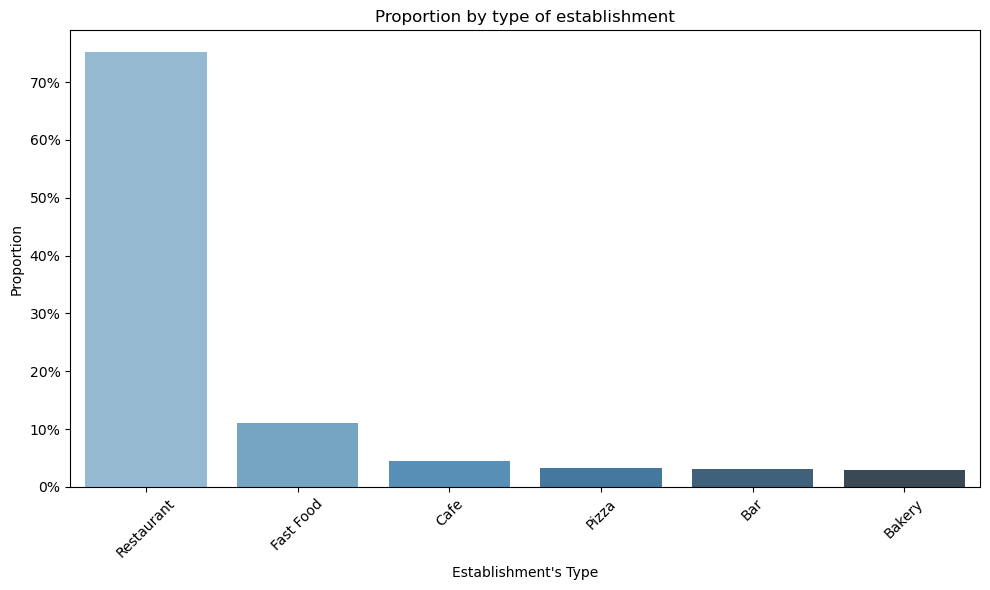

In [236]:
# Plotting the chart
plt.figure(figsize=(10, 6))
sns.barplot(data=counts_by_type, x='object_type', y='proportion', hue='object_type', palette='Blues_d')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Proportion by type of establishment')
plt.xlabel("Establishment's Type")
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

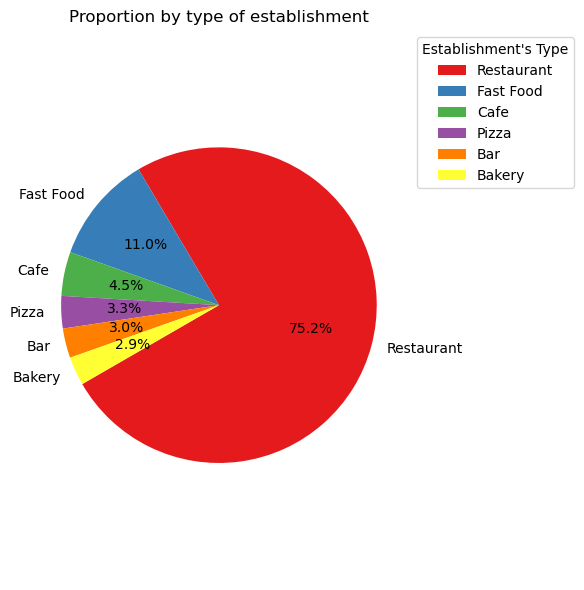

In [237]:
# Plotting a pizza chart
plt.figure(figsize=(6, 6))
plt.pie(
    counts_by_type['proportion'],
    labels=counts_by_type['object_type'],
    autopct='%1.1f%%',
    colors=plt.get_cmap('Set1').colors,
    startangle=210
)

plt.title("Type of establishment's Proportion")
plt.axis('equal')  # Mantém o gráfico em círculo
plt.legend(title="Establishment's Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
“Restaurant” represents over 70% of all establishments.

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Investigating the proportions of establishments that are from a chain and not.

In [240]:
# Counting chain and non-chain establishments.
chain_counts = rest_data['chain'].value_counts().reset_index()
chain_counts.columns = ['chain', 'count']
chain_counts

,chain,count
0,False,5972
1,True,3676


In [241]:
# Calculando o total de esbelecimentos de rede e sem rede.
total_chain = chain_counts['count'].sum()
total_chain

9648

In [242]:
# Calculating the total chain and non-chain establishments.
total_chain = chain_counts['count'].sum()
chain_counts['proportion'] = chain_counts['count'] / total_chain
chain_counts

,chain,count,proportion
0,False,5972,0.618988
1,True,3676,0.381012


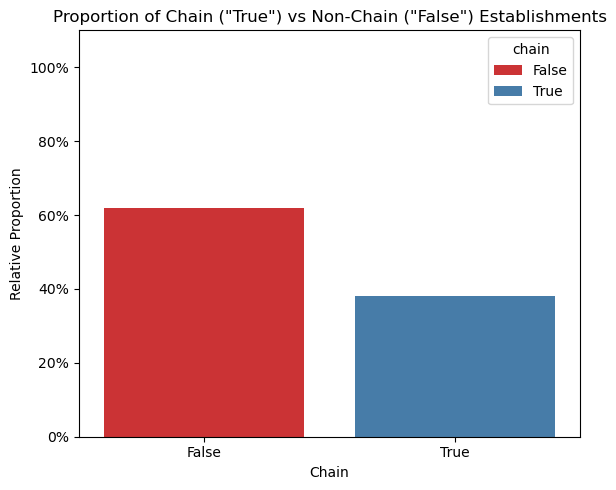

In [243]:
# Plotting a bar chart
plt.figure(figsize=(6, 5))
sns.barplot(data=chain_counts, x='chain', y='proportion', hue= 'chain', palette='Set1')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Proportion of Chain ("True") vs Non-Chain ("False") Establishments')
plt.xlabel('Chain')
plt.ylabel('Relative Proportion')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

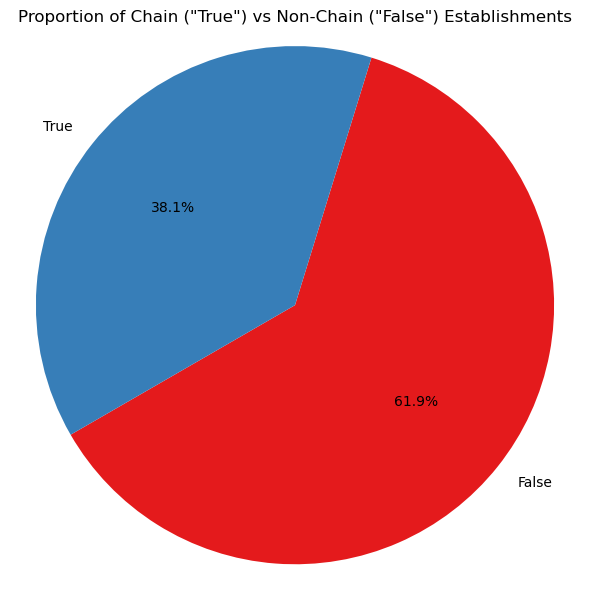

In [244]:
# Plotting a pizza chart
plt.figure(figsize=(6, 6))
plt.pie(
    chain_counts['proportion'],
    labels=chain_counts['chain'],
    autopct='%1.1f%%',
    colors=plt.get_cmap('Set1').colors,
    startangle=210
)

plt.title('Proportion of Chain ("True") vs Non-Chain ("False") Establishments')
plt.axis('equal')
plt.tight_layout()
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
61.9% of establishments are not part of a chain, while 38.1% are part of a chain.

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating which type of establishment is typical to be in a chain.

In [247]:
# Counting establishments by type and whether or not they are part of a chain
chain_by_type = rest_data.groupby(['object_type', 'chain']).size().reset_index(name='count')
chain_by_type

,object_type,chain,count
0,Bakery,True,283
1,Bar,False,215
2,Bar,True,77
3,Cafe,False,169
4,Cafe,True,266
5,Fast Food,False,461
6,Fast Food,True,605
7,Pizza,False,166
8,Pizza,True,153
9,Restaurant,False,4961


In [248]:
# Calculating the total of establishments by type
chain_by_type['total'] = chain_by_type.groupby('object_type')['count'].transform('sum')
chain_by_type

,object_type,chain,count,total
0,Bakery,True,283,283
1,Bar,False,215,292
2,Bar,True,77,292
3,Cafe,False,169,435
4,Cafe,True,266,435
5,Fast Food,False,461,1066
6,Fast Food,True,605,1066
7,Pizza,False,166,319
8,Pizza,True,153,319
9,Restaurant,False,4961,7253


In [249]:
# Calculating relative proportion by type
chain_by_type['proportion'] = chain_by_type['count'] / chain_by_type['total']
chain_by_type

,object_type,chain,count,total,proportion
0,Bakery,True,283,283,1.000000
1,Bar,False,215,292,0.736301
2,Bar,True,77,292,0.263699
3,Cafe,False,169,435,0.388506
4,Cafe,True,266,435,0.611494
5,Fast Food,False,461,1066,0.432458
6,Fast Food,True,605,1066,0.567542
7,Pizza,False,166,319,0.520376
8,Pizza,True,153,319,0.479624
9,Restaurant,False,4961,7253,0.683993


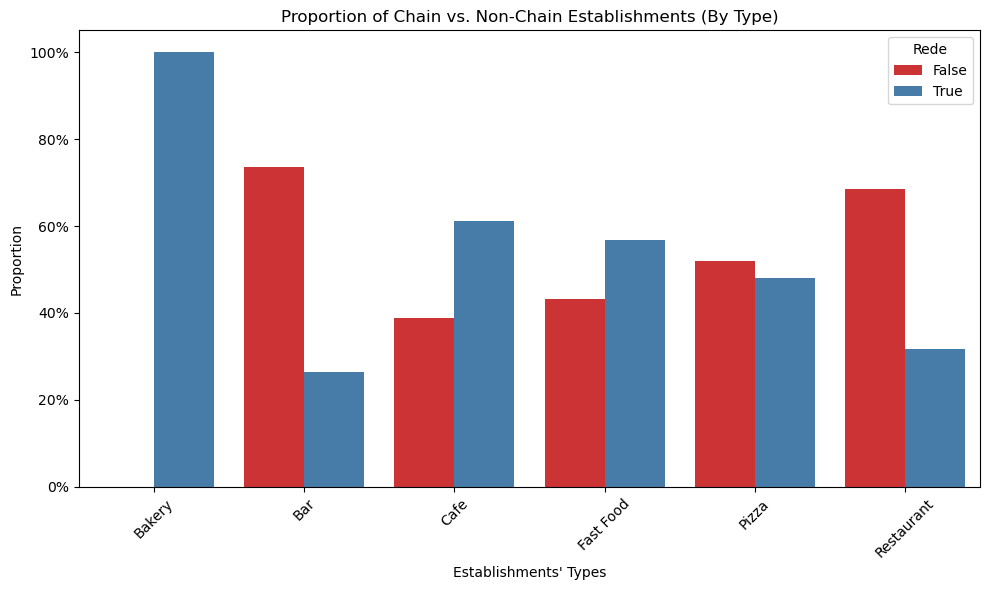

In [250]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=chain_by_type,
    x='object_type',
    y='proportion',
    hue='chain',
    palette='Set1'
)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Proportion of Chain vs. Non-Chain Establishments (By Type)')
plt.xlabel("Establishments' Types")
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Rede')
plt.tight_layout()
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
The most typical establishment to be in a chain is 'bakery', and it also has no establishments without being in a chain.

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating the average number of seats for each type of restaurant.

In [253]:
# Calculating average seating by type of establishment
mean_seats_by_type = rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False).reset_index()
mean_seats_by_type

,object_type,number
0,Restaurant,48.042316
1,Bar,44.767123
2,Fast Food,31.837711
3,Pizza,28.459375
4,Cafe,25.000000
5,Bakery,21.773852


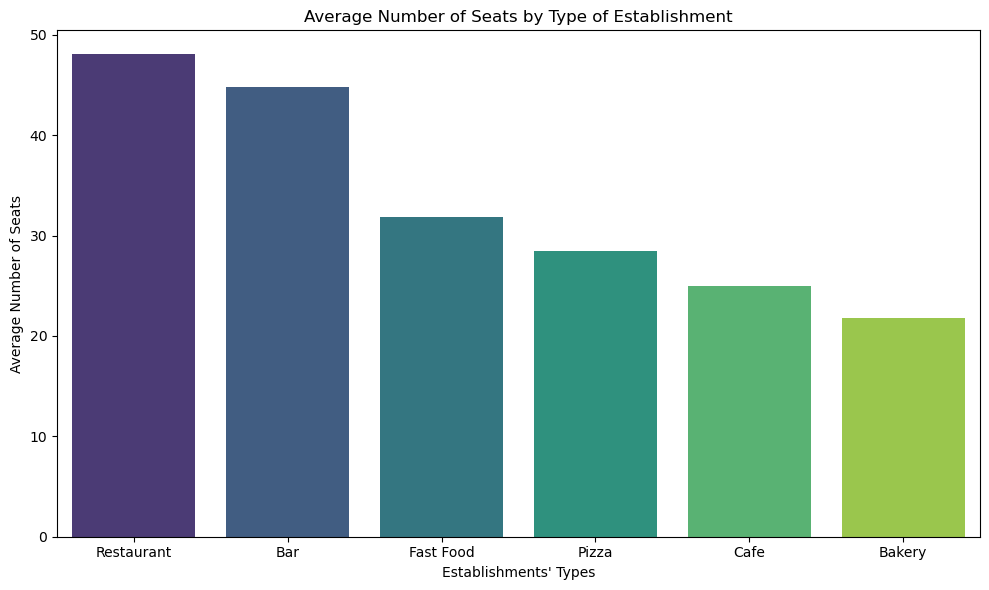

In [254]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_seats_by_type, x='object_type', y='number', hue='object_type', palette='viridis')
plt.title('Average Number of Seats by Type of Establishment')
plt.xlabel("Establishments' Types")
plt.ylabel('Average Number of Seats')
plt.tight_layout()
plt.show()

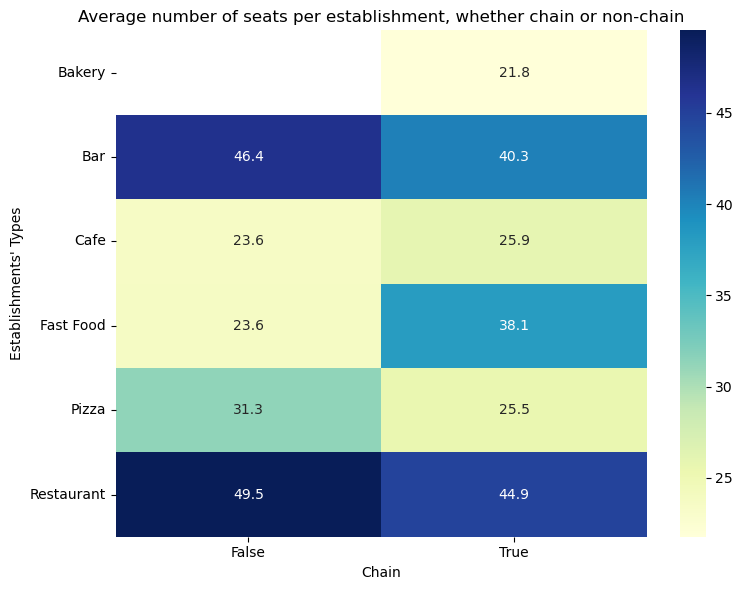

In [255]:
# Making a heatmap
heatmap_data = rest_data.pivot_table(
    values='number',
    index='object_type',
    columns='chain',
    aggfunc='mean'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu')

plt.title('Average number of seats per establishment, whether chain or non-chain')
plt.xlabel('Chain')
plt.ylabel("Establishments' Types")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
The 'restaurant' type has the highest average number of seats, even being from a chain or not.

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Placing data from the 'address' column in a separate column.

In [258]:
rest_data['address'].unique()

array(['3708 N EAGLE ROCK BLVD', '100 WORLD WAY 120',
       '6801 HOLLYWOOD BLVD 253', ..., '6741 HOLLYWOOD BLVD',
       '548 S SPRING ST STE 100', '1300 S SAN PEDRO ST STE 111'],
      dtype=object)

In [259]:
rest_data['address'].nunique()

8512

In [260]:
# Removing the number from the beginning of each string
rest_data['street_name'] = rest_data["address"].str.replace(r"^\d+\s+", "", regex=True)
rest_data.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Building a chart of the ten streets with the largest number of restaurants.

In [262]:
top_streets = rest_data["street_name"].value_counts().head(10)
top_streets

street_name
W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
S WESTERN AVE        128
Name: count, dtype: int64

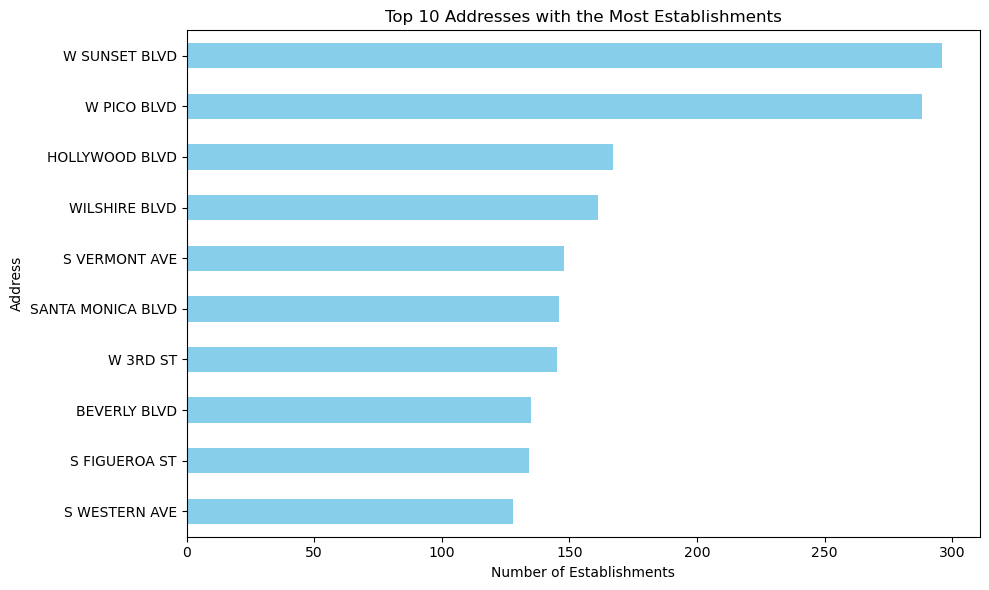

In [263]:
plt.figure(figsize=(10, 6))
top_streets.plot(kind='barh', color='skyblue')
plt.xlabel("Number of Establishments")
plt.ylabel("Address")
plt.title("Top 10 Addresses with the Most Establishments")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
The streets 'W Sunset Blvd' and 'W Pico Blvd' are the ones that have the most establishments

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Finding the number of streets that have only one restaurant.

In [266]:
street_counts = rest_data["street_name"].value_counts()
street_counts.head()

street_name
W SUNSET BLVD     296
W PICO BLVD       288
HOLLYWOOD BLVD    167
WILSHIRE BLVD     161
S VERMONT AVE     148
Name: count, dtype: int64

In [267]:
unique_street_count = (street_counts == 1).sum()
print("Number of streets with only one establishment:", unique_street_count)

Number of streets with only one establishment: 2450


<span style = "color: black; font-family: arial; font-size: 20px;">
There are 2450 streets with just one establishment.

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Analyzing the relationship of streets with many restaurants with the distribution of the number of seats.

In [270]:
# Selecting the 10 streets with the most restaurants
top_streets = rest_data['street_name'].value_counts().head(10).index

In [271]:
# Filtering the data with establishments from these streets
top_streets_data = rest_data[rest_data['street_name'].isin(top_streets)]

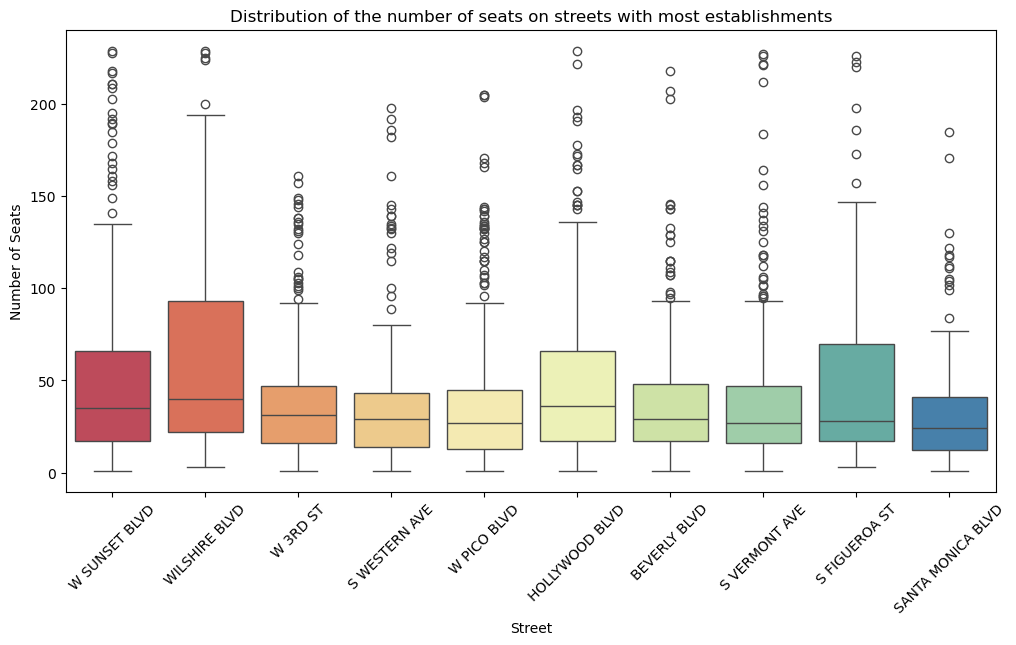

In [272]:
# Creating a boxplot to visualize seating distributions
plt.figure(figsize=(12,6))
sns.boxplot(
    x='street_name',
    y='number',
    data=top_streets_data,
    hue='street_name',        
    palette='Spectral',           
    dodge=False               
)

plt.title('Distribution of the number of seats on streets with most establishments')
plt.xlabel('Street')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
Wilshire Bldv Street is the street that has the highest number of seats and also the highest average seat number.

# Conclusions and recommendations

<span style = "color: black; font-family: arial; font-size: 20px;">

- The Los Angeles market is dominated by **'restaurant'** (more than **70%** of all establishments).

- **Most business are independent** (61.9%), but chained establishments also have a strong presence (38.1%).

- **'Bakery'** is almost a exclusive segment from chains.

- The type **'Restaurant'** has the **highest average number of seats**, both in chain and non-chain establishments.

- The streets **W Sunset Blvd** and **W Pico Blvd** concentrate many establishments, indicating high competition.

- There are **2450 streets** with just one establishment, poiting opportunities in less saturated places.

- **Wilshire Blvd** is a large pole, with the highest number of seats as well as the highest average number of seats.

Recommendations

- Avoid superconcentrated poles (such as W Sunset BLVD and W Pico Blvd).

- Prioritize streets with low competition, but close to high flow areas, exploring opportunities between 2450 streets with only one or a few establishments.

- Consider the region of **WILSHIRE BLVD** as strategic by having a consumer and infrastructure profile.

- Develop a long -term strategy, focusing on loyalty and positioning, ensuring business sustainability.